# *Лабораторна робота №3.*
# *По темі : Пакет Tensorflow*
***


## **Виконав:** 
* ## Студент 4 курсу
* ## Группи АнД-41
* ## Сірий Артем Олександрович
* ## Варінат №11

***

## *Завдання :*
## 1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
## 2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці. 
* ## Класи : 0 , 5 , 7
## 3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
## 4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
## 5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
## 6. Результати викласти у репозиторії GitHub (папка Lab3).
## 7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

***


# *Імпорт даних*

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

# Конвертуємо дані з RGB до чорно-білих (тобто з [0 до 255] до [0 та 1]). 

In [6]:
train_data = train_data/255.0
test_data = test_data/255.0

# Оберемо потрібні класи (0, 5, 7)

In [12]:
for i in train_labels:
    if(i!=0 and i!=5 and i!=7 ):
        train_data = np.delete(train_data, obj=np.where(train_labels == i), axis=0)
        train_labels = np.delete(train_labels, obj=np.where(train_labels == i), axis=0)

In [13]:
print(len(train_labels))
print(train_labels)

18000
[0 0 0 ... 5 0 5]


In [14]:
train_data.shape, train_labels.shape

((18000, 28, 28), (18000,))

In [7]:
for i in test_labels:
    if(i!=0 and i!=5 and i!=7 ):
        test_data = np.delete(test_data, obj=np.where(test_labels == i), axis=0)
        test_labels = np.delete(test_labels, obj=np.where(test_labels == i), axis=0)

In [8]:
print(len(test_labels))
print(test_labels)

3000
[5 7 5 ... 5 5 5]


In [9]:
test_data.shape, test_labels.shape

((3000, 28, 28), (3000,))

In [10]:
class_names = ['T-shirt/top', '', '', '', '', 
    'Sandal', '', 'Sneaker', '', '']
len(class_names)

10

# *Виведемо перші 10 малюнки*

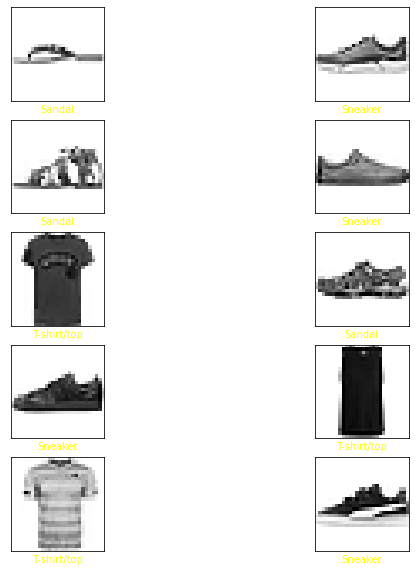

In [11]:
plt.figure(figsize=(10,10))
for p in range(10):
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_data[p], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[p]], color='yellow')

# *Побудуємо модель*

In [94]:
model1 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(128 , activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

In [99]:
history = model1.fit(
    train_data,train_labels, 
    epochs = 30, 
    validation_data=(test_data,test_labels), 
    batch_size = 512
)

Epoch 1/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9752 - val_loss: 0.0815 - val_accuracy: 0.9723
Epoch 2/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9763 - val_loss: 0.0797 - val_accuracy: 0.9730
Epoch 3/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0.0784 - val_accuracy: 0.9740
Epoch 4/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.9766 - val_loss: 0.0771 - val_accuracy: 0.9743
Epoch 5/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0760 - val_accuracy: 0.9747
Epoch 6/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9774 - val_loss: 0.0752 - val_accuracy: 0.9753
Epoch 7/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9772 - val_loss: 0.0741 - val_accuracy: 0.9753
Epoch 8/30
36/36 [==

In [100]:
test_loss, test_acc = model1.evaluate(test_data,test_labels)
print('Test accuracy : ', test_acc)

94/94 [==============================] - 0s 430us/step - loss: 0.0608 - accuracy: 0.9787
Test accuracy :  0.9786666631698608


# *Перевіримо модель*

In [66]:
predictions = model1.predict(test_data)

In [67]:
np.argmax(predictions[0])

5

In [68]:
test_labels[0]

5

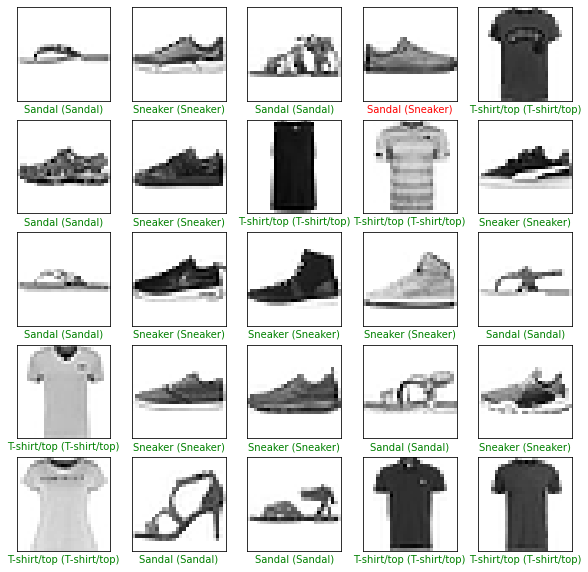

In [123]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if (predicted_label == true_label):
        color = 'green'
    else :
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color = color)

# *Візуалізація залежності від Learning_rate*

# Точність 

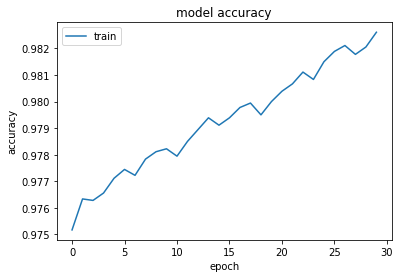

In [101]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Втрати

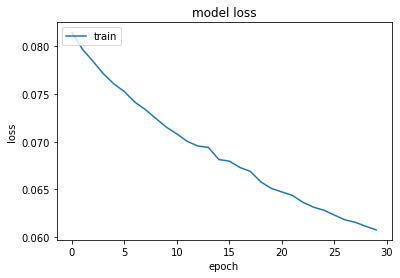

In [102]:
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# *Зменшимо learning_rate=0.0001 до 0.01*

In [106]:
model2 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(128 , activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.01), 
    metrics=['accuracy']
)

In [107]:
history1 = model2.fit(
    train_data,train_labels, 
    epochs = 30, 
    validation_data=(test_data,test_labels), 
    batch_size = 512
)

Epoch 1/30
36/36 [==============================] - 0s 6ms/step - loss: 0.2949 - accuracy: 0.8803 - val_loss: 0.0999 - val_accuracy: 0.9637
Epoch 2/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9692 - val_loss: 0.0794 - val_accuracy: 0.9687
Epoch 3/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9778 - val_loss: 0.0639 - val_accuracy: 0.9770
Epoch 4/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9802 - val_loss: 0.0597 - val_accuracy: 0.9777
Epoch 5/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9807 - val_loss: 0.0595 - val_accuracy: 0.9790
Epoch 6/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9843 - val_loss: 0.0584 - val_accuracy: 0.9793
Epoch 7/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.0533 - val_accuracy: 0.9823
Epoch 8/30
36/36 [==

In [108]:
test_loss, test_acc = model2.evaluate(test_data,test_labels)
print('Test accuracy : ', test_acc)

94/94 [==============================] - 0s 462us/step - loss: 0.0546 - accuracy: 0.9830
Test accuracy :  0.9829999804496765


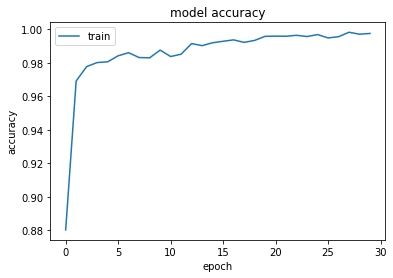

In [111]:
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

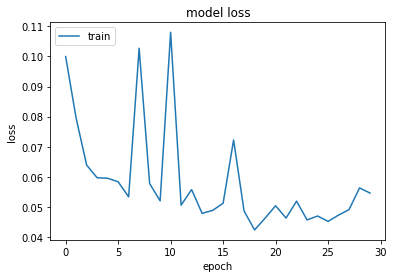

In [112]:
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# *Швидкість навчання стала більшою, проте втрати також значно виросли*

In [113]:
model3 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(128 , activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.001), 
    metrics=['accuracy']
)

history2 = model3.fit(
    train_data,train_labels, 
    epochs = 30, 
    validation_data=(test_data,test_labels), 
    batch_size = 512
)

Epoch 1/30
36/36 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.8442 - val_loss: 0.1707 - val_accuracy: 0.9447
Epoch 2/30
36/36 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.9574 - val_loss: 0.1165 - val_accuracy: 0.9603
Epoch 3/30
36/36 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9644 - val_loss: 0.0940 - val_accuracy: 0.9680
Epoch 4/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9706 - val_loss: 0.0831 - val_accuracy: 0.9697
Epoch 5/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9731 - val_loss: 0.0799 - val_accuracy: 0.9707
Epoch 6/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9751 - val_loss: 0.0740 - val_accuracy: 0.9747
Epoch 7/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9769 - val_loss: 0.0735 - val_accuracy: 0.9723
Epoch 8/30
36/36 [==

In [114]:
test_loss, test_acc = model3.evaluate(test_data,test_labels)
print('Test accuracy : ', test_acc)

94/94 [==============================] - 0s 441us/step - loss: 0.0455 - accuracy: 0.9830
Test accuracy :  0.9829999804496765


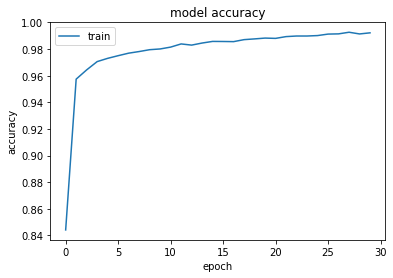

In [115]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

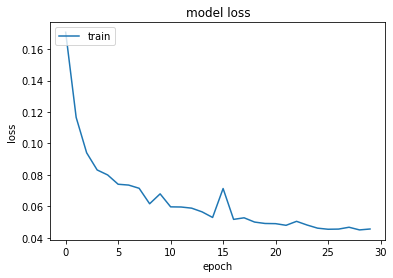

In [116]:
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# *Отже оптимальним варіантом є learning_rate=0.001*

# *Побудова Confusion Matrix*

In [124]:
from sklearn.metrics import confusion_matrix

In [142]:
predyction_samples = [np.argmax(i) for i in predictions]
matrix = confusion_matrix(test_labels,predyction_samples)
df_confusion = pd.DataFrame(matrix, columns=['T-shirt/top', 'Sandal', 'Sneaker'], index = ['T-shirt/top', 'Sandal', 'Sneaker'])
df_confusion

,T-shirt/top,Sandal,Sneaker
T-shirt/top,997,3,0
Sandal,0,981,19
Sneaker,0,42,958


Text(0.5, 0, '')

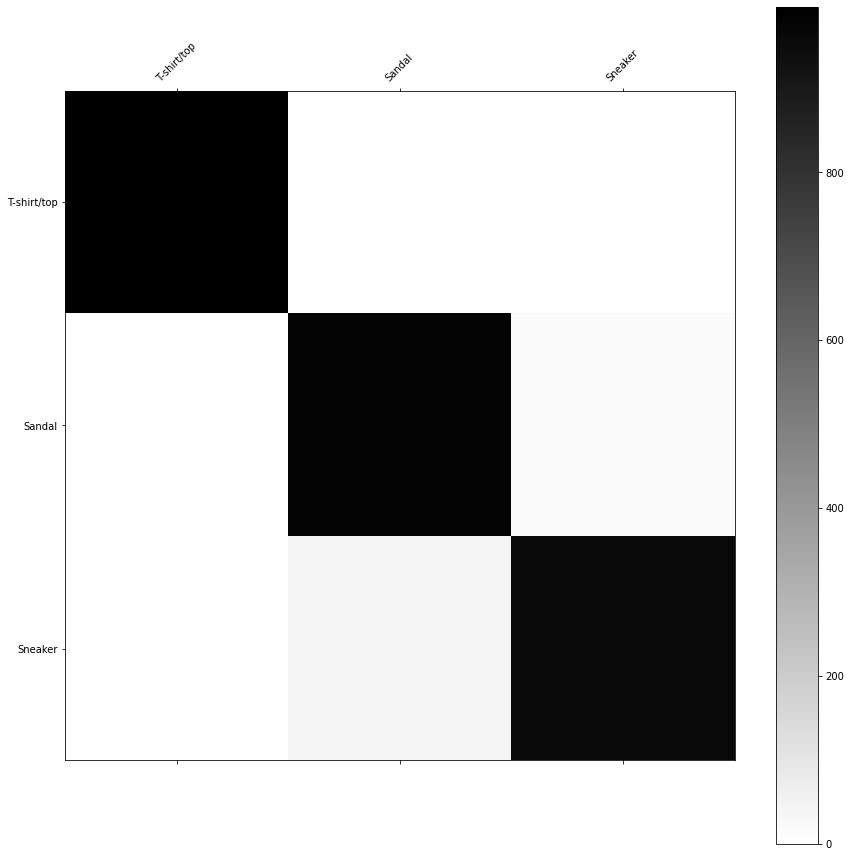

In [154]:
plt.figure(figsize=(15,15))
plt.matshow(df_confusion, cmap=plt.cm.gray_r, fignum=1)
plt.colorbar()
tick_marks = np.arange(len(df_confusion.columns))
plt.xticks(tick_marks, df_confusion.columns, rotation=45)
plt.yticks(tick_marks, df_confusion.index)
plt.ylabel(df_confusion.index.name)
plt.xlabel(df_confusion.columns.name)  

***
# *Висновок*
***
## *В ході виконання лаборатоної роботи було використано бібліотеку з набором фотографій розміром 28х28 пікселів, а також маркеруванням приналежності до класів.*
## *Загальна кількість вибірки 70 000 екземплярів. Після відсіювання класів за варіантом залишилось 21 000 фото.*
## *Провевши моделювання та n-у кількість тестів, було виявленно стабільну модель, при швидкості росту 0.001. За якої було досягнуто швидкого росту, та помірного рівня помилок.*
## *В кінці побудовано Confusion Matrix, на якій видно що алгоритм працює досить точно, а саме 98,3%, а тому модель досить якісно відрізняє кросівки від сандалів та футболки*